# 12/2021 Questions

This notebook will track progress on practice questions that are sent by the InterviewQs website. 

------------------
## 12/29 Question

You are given a data set of Baby names. Using this, write code to determine what the top boy and girl names were in 2009.

### Approach

The given dataframe has columns for Name, Year, Gender and count which we can use to filter and aggregate data. To answer the question we will:
- create two dataframes, one each for males and females born in 2009. These will be accessed for further analysis and reduces processing of irrelevant data in the future
- group each of the dataframes by name and sum the values of each numeric column during that process. This will allow us to get a final count for each name
- find the index where the Count of names is highest, and show the corresponding name for that index in the dataframe

### Result

Per the below, the top boy name in 2009 was Jacob and the top girl name was Isabella

In [1]:
#importing libaries
import numpy as np
import pandas as pd

In [3]:
#reading csv into a dataframe
baby_names = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
    

In [15]:
#viewing dataframe
baby_names.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [159]:
# create two dfs, one each for male and female babies in 2009
male_names_2009 = baby_names[(baby_names["Gender"]=="M") & (baby_names["Year"]==2009)]
female_names_2009 = baby_names[(baby_names["Gender"]=="F") & (baby_names["Year"]==2009)]

In [160]:
# group above df's by name, and sum the value of each numeric column
male_names_2009 = male_names_2009.groupby("Name").sum().reset_index()
female_names_2009 = female_names_2009.groupby("Name").sum().reset_index()

In [169]:
#find index with highest Count value, and show the male Name for that row's value
male_names_2009.iloc[[male_names_2009["Count"].idxmax()]]["Name"]

1889    Jacob
Name: Name, dtype: object

In [168]:
#find index with highest Count value, and show the female Name for that row's value
female_names_2009.iloc[[female_names_2009["Count"].idxmax()]]["Name"]

2404    Isabella
Name: Name, dtype: object

<strong> The top boy name in 2009 was Jacob and the top girl name was Isabella <strong>

---------------
## 12/27/2021 Question

Suppose you're working in a parts manufacturing plant, and you're running quality analysis on the gasket production line. Gaskets produced by your company will be defective 1% of the time, and are distributed to customers in packs of 20. Your company has a policy where if 2 or more of the 20 gaskets in a given pack is defective, they will replace the entire package for free. What proportion of packages does the company need to replace?

### Approach

This problem deals with a binomial distribution. To solve this problem I will use the binomial formula:

b(x,n,P) = nCx * P^x * (1 - P)^(n - x) = { n! / [ x! (n - x)! ] } * Px * (1 - P)^(n - x)

In the problem, it asks us for the probability that >=2 items will be defective. To do so, we will calculate the probability of 0 or 1 defects occurring and subtract from 100%

In our case:
- n is the total amount of items being sent per order, 20
- x is the amount of correct items in the pack, in this case 19 and 20 out of the 20
- P is the probability of success. this is 100%-1% defect rate = 99%

### Solution
Per the below math, the final result of this process is 1.68% of packages will need to be replaced

In [181]:
import math

In [182]:
#set our n value
n = 20

In [183]:
# set initial x value of 19, for 1 defect case
x1 = 19

In [184]:
# set second x value of 20, for 0 defect case
x2=20

In [185]:
#set our probability of success
P = .99

In [186]:
#set b1 probability of having 1 defect in a package
b1 = (math.factorial(n)/(math.factorial(x1)*math.factorial(n-x1)))*P**x1*(1-P)**(n-x1)

In [187]:
#set b2 probability of having 0 defects in a package
b2 = (math.factorial(n)/(math.factorial(x2)*math.factorial(n-x2)))*P**x2*(1-P)**(n-x2)

In [188]:
#calculate precent of having >=2 defects per package, by subtracting probabilities of <=1 defect from 100%
defective_package_rate=(1-(b1+b2))*100
defective_package_rate

1.6859337635651839

<strong> Our final answer per the above calculations is that the percent of packages that will need to be sent back are 1.68% <strong>

________________________________
## 12/24/2021 Question

Given the following dataset, can you find the top state for baby births? One way to show this visually to a stakeholder would be to plot the births by state (using something like matplotlib).

### Approach

To find births by state, I will:
- Import data
- Take out columns that aren't relevant to the analysis
- Group data by the state column
- Plot the data per the task specification

### Solution

Per the below, the state with most births was California

In [171]:
#import data processing and visualization packages
import pandas as pd
import seaborn as sns

In [172]:
#import data
data= pd.read_csv("./Data/2021_12_24_US_Baby_Names.csv")

In [173]:
#look at data to structure queries
data.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [174]:
#drop cols that aren't relevant to task. We only need to keep State Name and count of births cols
data=data.drop(["Id","Unnamed: 0", "Name", "Year", "Gender"],axis=1)

In [175]:
#create new dataframe, with births grouped by state
state_data = data.groupby(["State"]).count().sort_values(by="Count", ascending=False)

In [176]:
#reset the index so the state names can be used in plots, and rename the counts column for clarity
state_data.reset_index(inplace=True)
state_data = state_data.rename(columns = {'Count':'Total_Births'})


In [179]:
#display the state with highest births
state_data.iloc[state_data["Total_Births"].idxmax()]["State"]

'CA'

<AxesSubplot:xlabel='State', ylabel='Total_Births'>

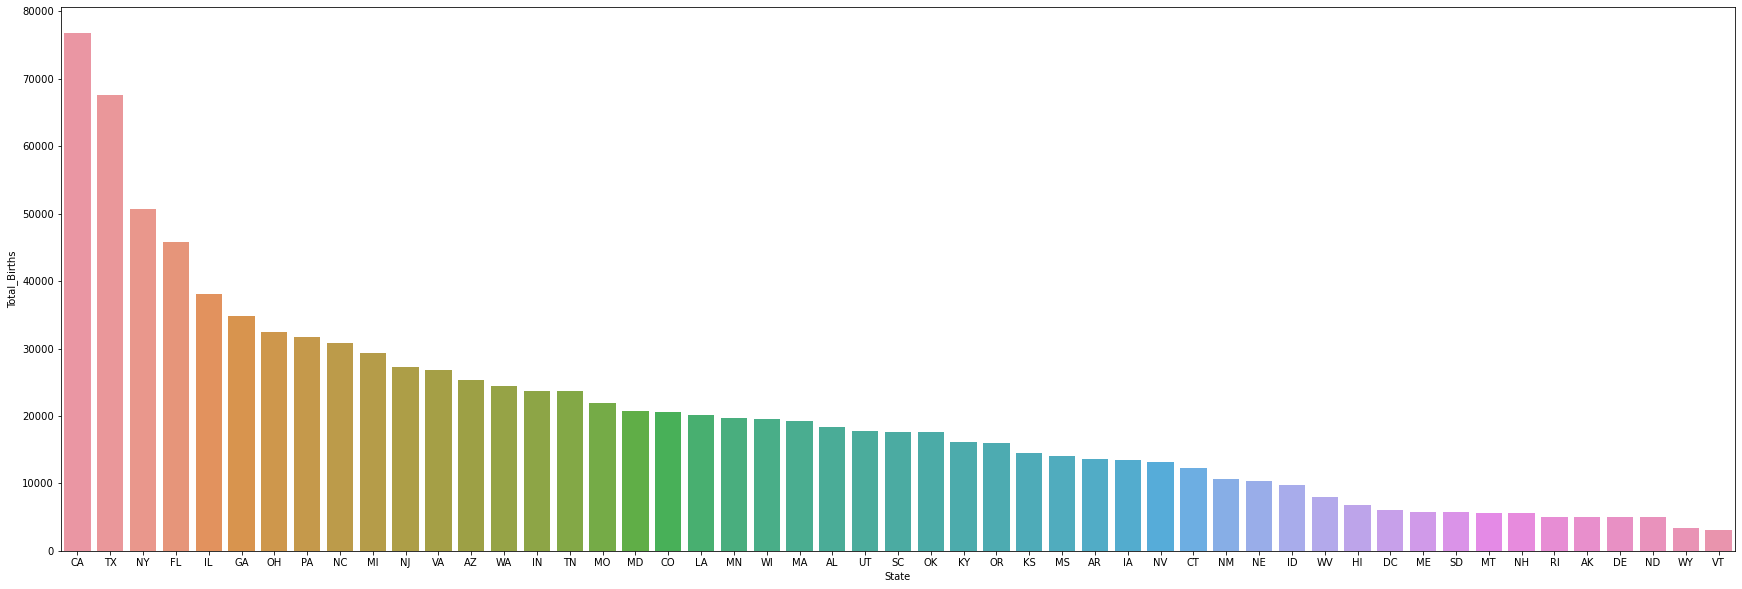

In [115]:
#use seaborn to plot births by state for stakeholders
plt.figure(figsize=(30,10))
sns.barplot(x='State',y="Total_Births",data=state_data)

<strong> The state with most births was California. <strong>

_______________________________
## 12/22/2021 Question

### Question

Suppose you're provided two tables, as shown below. One table contains the price for a given product in a given region, while another contains sales for the past week. Given the two tables, write a SQL query to pull the total earnings for each product/region combination.

Table: prices 
    
region, product, price <br>
Americas, Pepsi, 2.2 <br>
EMEA, Pepsi, 1.8 <br>
APAC, Pepsi, 1.5 <br>
Americas, Coke, 2.5 <br>
EMEA, Coke, 2.0 <br>
APAC, Coke, 1.8 <br>
    
    
Table: sales 
    
region	product	num_sales
Americas,	Pepsi,	20 <br>
EMEA,	    Pepsi,	25 <br>
APAC,	    Pepsi,	22 <br>
Americas,	Coke,	30 <br>
EMEA,	    Coke,	10 <br>
APAC,	    Coke,	13 <br>

### Approach

In this problem, we want to aggregate the sales and price for each region and product combination. To do this we will:
- join the tables. this will be an inner join on the condition that both the region and product columns in each table are matching
- the third column in this joined table will be the result of multiplying product price by num_sales for each region/product row

This Jupyter notebook only supports python, but the SQL code would be:

SELECT prices.region, prices.product, sum(prices.price*sales.num_sales) <br>
FROM prices join sales <br>
ON prices.region=sales.region and prices.product=sales.product <br>
GROUP BY prices.region, prices.product 

Similarly, the above can be done in Pandas. The code for this is below:

In [6]:
import pandas as pd

In [15]:
prices = pd.read_csv("./Data/Prices.csv")
sales = pd.read_csv("./Data/Sales.csv")

In [16]:
total_earnings = pd.merge(prices, sales,  how='inner', left_on=['region','product'], right_on = ['region','product'])

In [17]:
total_earnings["total_earnings"] = total_earnings["price"]*total_earnings["num_sales"]

In [20]:
total_earnings[["region","product","total_earnings"]]

,region,product,total_earnings
0,Americas,Pepsi,44.0
1,EMEA,Pepsi,45.0
2,APAC,Pepsi,33.0
3,Americas,Coke,75.0
4,EMEA,Coke,20.0
5,APAC,Coke,23.4


-----------------------
## 12/20/2021 Question

World Leader Exits

Suppose you have the following dataset*, which is a list of leaders for all independent states in the world as outlined in Gleditsch and Ward.

With this data, plot the number of leaders by their exit code ('exitcode' in data) and the year that their rule ended ('endyear' in the data). You can represent this in a stacked bar chart, with the x-axis showing the end year and the y-axis showing the count of leaders by exitcode represented as a stacked bar chart.

### Approach

For this question I will:
- drop irreleavnt cols. we only need the enddate and the exitcode cols to answer the question
- get the year from the enddate col by extracting the first four chars of the values
- pivot the table. The rows will be by year, and y will be by exit code so each code has its own column and can be graphed more efficiently and viewed in the dataset more clearly by year
- graph the subsequent data in a stacked bar plot

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
#import data
world_leaders = pd.read_csv("./Data/2021_12_20_DDI_Dataset_Political_Leaders_political_leader.csv")

In [58]:
#extract relevant cols only
world_leaders = world_leaders[["enddate","exitcode"]]

In [59]:
#convert enddate data so that only the year is shown
length=len(world_leaders)
for i in range(length):
    world_leaders["enddate"][i]=world_leaders["enddate"][i][:4]

In [61]:
#pivot the table such that rows/index is by the exit year, cols are by exitcode, and values are the count of each code per relevant year
df_plot2 = world_leaders.groupby(['enddate', 'exitcode']).size().reset_index().pivot(columns='exitcode', index='enddate',values=0)


<AxesSubplot:xlabel='enddate'>

<Figure size 2880x720 with 0 Axes>

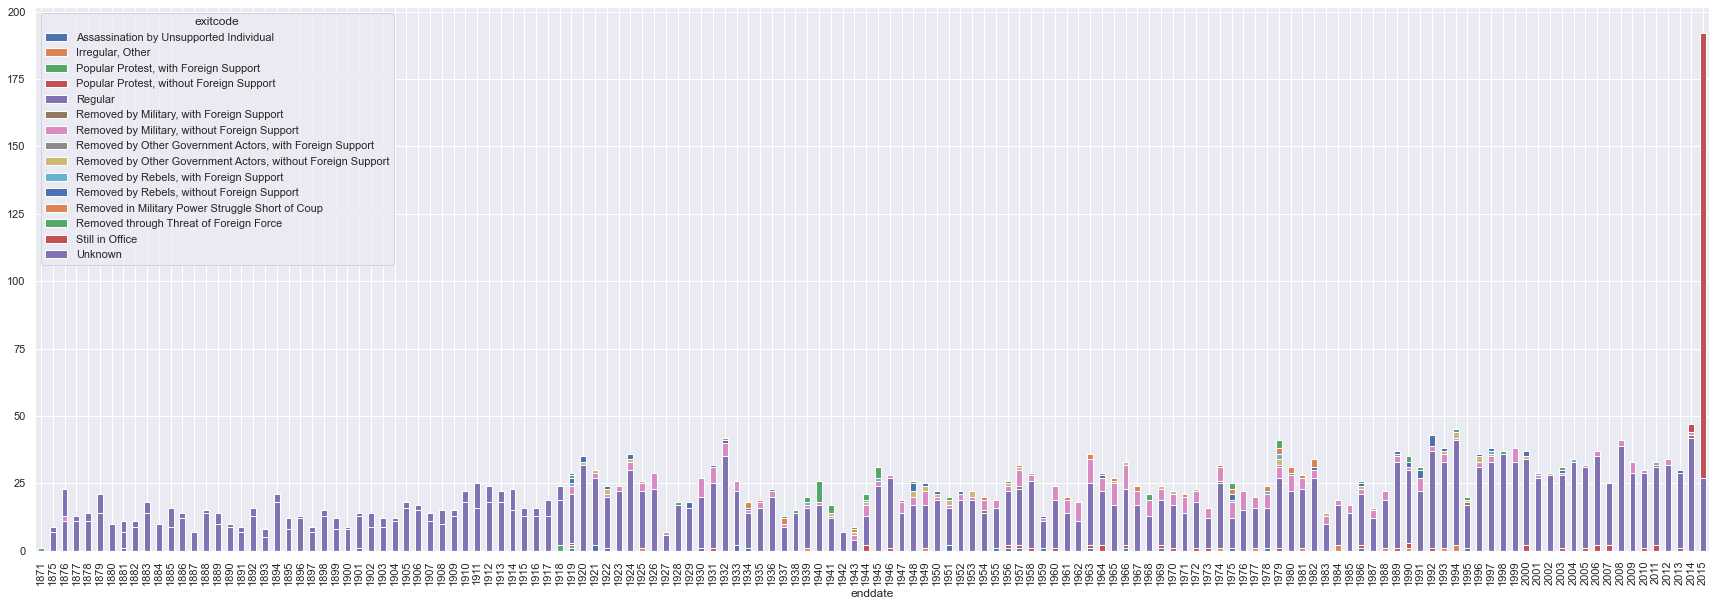

In [62]:
#plot data with seaborn as a stacked bar plot
sns.set(rc = {'figure.figsize':(30,10)})
df_plot2.plot(kind='bar', stacked=True)

-------------------

## 12/08/2021 Question

Suppose you're consulting for a school district, and the head of the school district thinks the students have above average intelligence. A random sample of thirty students have a mean IQ score of 112. Is there sufficient evidence to support the head's claim? You can assume the mean IQ score across the population of all students (e.g. including students outside the head's school district) is 100, with a standard deviation of 15. 

### Approach

- Run a one sample T test and determine the resultant p value. Assume an alpha level of 5%

### Solution

Based on the problem statement, I can run a one sample T test to compare a sample to a mean population value. In this case, the sample mean is 112, N is 30, and SD is 15. The hypothetical mean is 100. Degrees of freedom are 30-1 = 29.

Null hypothesis: the IQ of the two groups is the same
Alternate hypothesis: the IQ of the students in question is higher than the mean by 12 points

t = 112 - 100 / (15 / sqrt(30)) = 4.38

Using a one tailed T test distribution, using an alpha of .05 and degrees of freedom of 29 the corresponding value is 1.699. Since our value of 4.38 is larger than 1.699, we can reject the null hypothesis and conclude that the students in question do have above average IQ.